In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
cols = ["Make", "Model", "Year", "Engine HP", "Engine Cylinders", "Transmission Type", "Vehicle Style", "highway MPG", "city mpg", "MSRP"]

In [5]:
df_small = df[cols].copy()
df_small.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [6]:
df_small.columns = df_small.columns.str.lower().str.replace(" ", "_")

In [7]:
df_small.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

In [8]:
df_small.dtypes[df_small.dtypes == "object"].keys().to_list()

['make', 'model', 'transmission_type', 'vehicle_style']

In [9]:
for col in df_small.dtypes[df_small.dtypes == "object"].keys().to_list():
    df_small[col] = df_small[col].str.lower().str.replace(" ", "_")

In [10]:
df_small.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [11]:
df_small = df_small.fillna(0)

In [12]:
def Repeat(x):
    _size = len(x)
    repeated = []
    for i in range(_size):
        k = i + 1
        for j in range(k, _size):
            if x[i].lower() == x[j].lower() and x[i].lower() not in repeated:
                repeated.append(x[i].lower())
    return repeated
models = df['Model'].unique().tolist()
models.sort()
Repeat(models)

['tc']

In [13]:
len(df[df['Model'].str.lower() == 'tc'][cols])

17

In [14]:
all_mean = df_small.msrp.mean()
df_small['above_average'] = (df_small.msrp >= all_mean).astype(int)
del df_small['msrp']

In [15]:
df_small.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,0


In [16]:
random_state = 1

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
full_train, test = train_test_split(df_small, test_size=0.2, random_state=random_state)
train, val = train_test_split(full_train, test_size=0.25, random_state=random_state)
len(train), len(val), len(test)

(7148, 2383, 2383)

In [19]:
train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
5727,toyota,highlander_hybrid,2016,280.0,6.0,automatic,4dr_suv,28,27,1
5814,chevrolet,impala_limited,2014,300.0,6.0,automatic,sedan,30,18,0
8450,buick,regal,2016,259.0,4.0,automatic,sedan,27,19,0
2396,volkswagen,cc,2015,280.0,6.0,automated_manual,sedan,25,17,1
5494,dodge,grand_caravan,2016,283.0,6.0,automatic,passenger_minivan,25,17,0


In [20]:
train = train.reset_index()
val = val.reset_index(drop=True)
test = test.reset_index(drop=True)

---

### Question 1: ROC AUC feature importance

In [23]:
numerical_col = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
categorical_col = ['make', 'model', 'transmission_type', 'vehicle_style']

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [25]:
def draw_roc_curve(df, y_target, score_col, ax=None):
    score_data = df[score_col]
    auc_score = roc_auc_score(df[y_target], score_data)
    if auc_score < 0.5:
        score_data = -score_data
        auc_score = roc_auc_score(df[y_target], score_data)
    fpr, tpr, t = roc_curve(df[y_target], score_data)
    sns.lineplot(y=tpr, x=fpr, ax=ax, label=score_col)
    return auc_score

In [26]:
def auc_scores_and_draw(df: pd.DataFrame):
    df_small = df.copy()
    figure, axes = plt.subplots(2, 3, sharex=True, figsize=(10,5))
    auc_scores = {}
    for r in range(axes.shape[0]):
        for a in range(axes.shape[1]):
            if ((r == axes.shape[0] - 1) and (a == axes.shape[1] - 1)):
                continue
            score_col = numerical_col[r*(axes.shape[1]) + a]
            auc_score = draw_roc_curve(df_small, 'above_average', score_col, ax=axes[r, a])
            auc_scores[score_col] = round(auc_score, 3)
    plt.show()
    print(auc_scores)

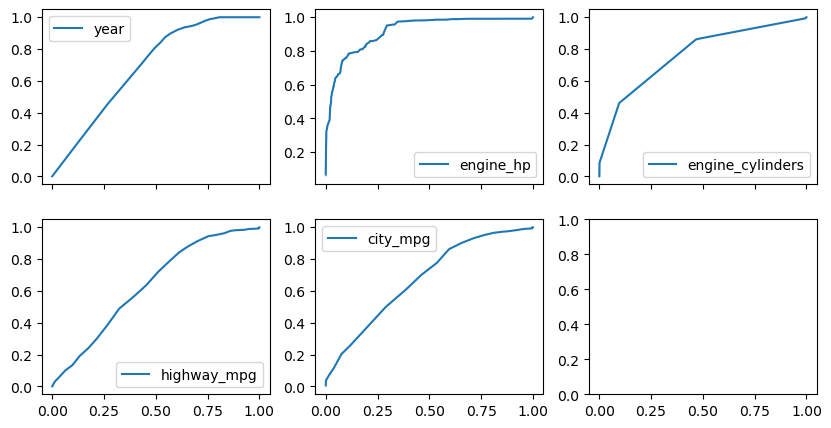

{'year': 0.688, 'engine_hp': 0.917, 'engine_cylinders': 0.766, 'highway_mpg': 0.633, 'city_mpg': 0.673}


In [27]:
auc_scores_and_draw(train)

#### Which numerical variable (among the following 4) has the highest AUC?
* engine_hp
* engine_cylinders
* highway_mpg
* `city_mpg`

In [29]:
train[numerical_col].corrwith(train.above_average)

year                0.315499
engine_hp           0.661713
engine_cylinders    0.451418
highway_mpg        -0.132043
city_mpg           -0.155487
dtype: float64

---

### Question 2: Training the model

In [32]:
from sklearn.feature_extraction import DictVectorizer

dict_df = train[categorical_col + numerical_col].to_dict(orient='records')
dv = DictVectorizer()
dv.fit(dict_df)

DictVectorizer()

In [33]:
def prepare_Xandy(df):
    df.copy()
    df['highway_mpg'] = -df['highway_mpg']
    df['city_mpg'] = -df['city_mpg']
    dict_df = df[categorical_col + numerical_col].to_dict(orient='records')
    X = dv.transform(dict_df)
    y = df.above_average
    return X, y

In [34]:
X_train, y_train = prepare_Xandy(train)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [37]:
X_val, y_val = prepare_Xandy(val)
y_val_prob = model.predict_proba(X_val)[:,1]
y_val_prob

array([0.61077922, 0.02046684, 0.49093483, ..., 0.00663045, 0.99998344,
       0.08447138])

In [38]:
auc_val = roc_auc_score(y_val, y_val_prob)
auc_val

0.9761329930330412

#### What's the AUC of this model on the validation dataset? (round to 3 digits)
* 0.678
* 0.779
* 0.878
* `0.979`

---

In [41]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [42]:
t = 0.5
cm = confusion_matrix(y_val, (y_val_prob > t).astype(int))
print(cm)
print("Precition", cm[1,1]/(cm[1,1] + cm[0,1]), precision_score(y_val, y_val_prob >= t))
print("Recall", cm[1,1]/(cm[1,1] + cm[1,0]), recall_score(y_val, y_val_prob >= t))

[[1657   72]
 [  86  568]]
Precition 0.8875 0.8875
Recall 0.8685015290519877 0.8685015290519877


0.4747474747474748 0.8721461187214612 0.8761467889908257


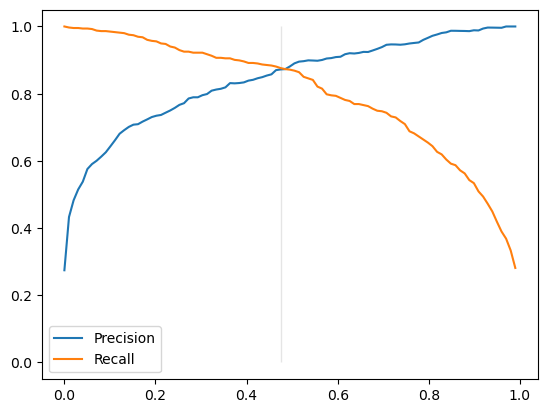

In [43]:
precisions = []
recalls = []
ts = []

for t in np.linspace(0,1,num=100):
    if(t == 1):
        continue
    preds = (y_val_prob >= t).astype(int)
    p = precision_score(y_val, preds)
    r = recall_score(y_val, preds)
        
    precisions.append(p)
    recalls.append(r)
    ts.append(t)

sns.lineplot(y=precisions, x=ts, label="Precision")
sns.lineplot(y=recalls, x=ts, label="Recall")

intersection_i = 0
for i in range(1, len(ts)):
    t = ts[i]
    if (precisions[intersection_i] < recalls[intersection_i]) and (precisions[i] >= recalls[i]):
        break
    else:
        intersection_i = i

final_t = ts[intersection_i]
final_p, final_r = precisions[intersection_i], recalls[intersection_i]
print(final_t, final_p, final_r)

sns.lineplot(y=[0, 1], x=[final_t, final_t], linestyle='--', color="grey", alpha=0.5)
plt.show()

#### At which threshold precision and recall curves intersect?
* 0.28
* `0.48`
* 0.68
* 0.88

---

### Question 4: F1 score

F1 = 2xPxR/(P + R)


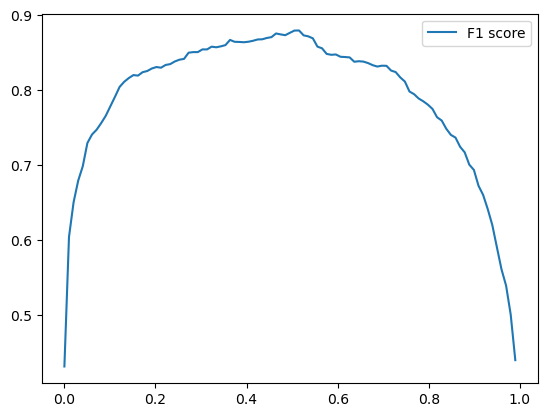

In [47]:
pa = np.array(precisions)
ra = np.array(recalls)

f1 = 2*pa*ra/(pa+ra)
sns.lineplot(y=f1, x=ts, label="F1 score")
plt.show()

In [48]:
m = f1.max()
mi = np.where(f1 == m)[0][0]
mt = ts[mi]
mt

0.5151515151515152

#### At which threshold F1 is maximal?
* 0.12
* 0.32
* `0.52`
* 0.72

---

### Question 5: 5-Fold CV

In [52]:
from tqdm.auto import tqdm
from sklearn.model_selection import KFold

from IPython.display import display

In [53]:
def cross_val(df: pd.DataFrame, n_splits: int, C=1.0):
    kf = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    scores = []
    for train_ids, val_ids in tqdm(kf.split(df), total=n_splits):
        dv = DictVectorizer(sparse=True)
        
        train_f = df.iloc[train_ids]
        X_t = dv.fit_transform(train_f[numerical_col + categorical_col].to_dict(orient='records'))
        y_t = train_f.above_average
        
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_t, y_t)

        val_f = df.iloc[val_ids]
        X_val = dv.transform(val_f[numerical_col + categorical_col].to_dict(orient='records'))
        y_val = val_f.above_average
        
        y_val_prob = model.predict_proba(X_val)[:,1]
        
        s = roc_auc_score(y_val, y_val_prob)
        
        scores.append(s)
    
    scores = np.array(scores)
    return scores.mean(), scores.std()

In [54]:
mean, std = cross_val(full_train, 5)
round(mean, 3), round(std, 3)

  0%|          | 0/5 [00:00<?, ?it/s]

(0.978, 0.001)

#### How large is standard deviation of the scores across different folds?

* 0.003
* `0.030`
* 0.090
* 0.140

### Question 6: Hyperparameter Tuning

In [57]:
def hyperparameter_tuning(full_train: pd.DataFrame, n_splits: int, Cs=[1.0]):
    df_scores = pd.DataFrame(columns=[])
    df_scores["C"] = Cs
    ms = []
    ss = []
    for C in tqdm(Cs, total=len(Cs)):
        m, s = cross_val(full_train, n_splits, C)
        ms.append(m)
        ss.append(s)
    df_scores["Mean scores"] = ms
    df_scores["std scores"] = ss
    return df_scores

In [58]:
hyperparameter_tuning(df_small, 5, [0.01, 0.1, 0.5, 10])

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

,C,Mean scores,std scores
0,0.01,0.954238,0.002492
1,0.10,0.971997,0.002382
2,0.50,0.977753,0.002369
3,10.00,0.978004,0.005137


#### Which C leads to the best mean score?
* 0.01
* 0.1
* 0.5
* `10`